<a href="https://colab.research.google.com/github/rbarman/lfa/blob/master/lesson2/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apply gradient descent to find the relationship between salary and years of experience

In [0]:
import pandas as pd
import json
from fastai.basics import *

**Get data**

In [0]:
! pip install -q kaggle
! mkdir ~/.kaggle
with open('kaggle.json', 'w') as outfile:
    json.dump({"username":"rbarman","key":"cf5429973fa07a49d7664b2c90917de3"}, outfile)
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
!mkdir data/
!kaggle datasets download rsadiq/salary --unzip -p data/
!ls data/

  0% 0.00/358 [00:00<?, ?B/s]
100% 358/358 [00:00<00:00, 312kB/s]
Salary.csv


In [61]:
df = pd.read_csv('data/Salary.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


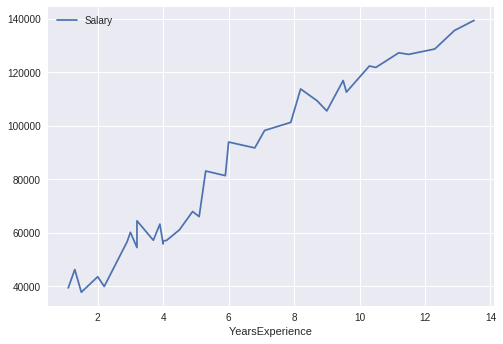

In [62]:
df.plot(x='YearsExperience',y='Salary');

There seems to be a general linear trend. The goal is to use gradient descent to find the line that best fits the data

**Set up tensors**

In [143]:
x = torch.ones(len(df),2)
x[:,0] = torch.tensor(df['YearsExperience'])
x[:5]

tensor([[1.1000, 1.0000],
        [1.3000, 1.0000],
        [1.5000, 1.0000],
        [2.0000, 1.0000],
        [2.2000, 1.0000]])

In [144]:
y = torch.tensor(df['Salary'].values,dtype=torch.float32)
y[:5]

tensor([39343., 46205., 37731., 43525., 39891.])

**Try random parameter values **

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

y_hat:tensor([ 0.1000,  0.3000,  0.5000,  1.0000,  1.2000,  1.9000,  2.0000,  2.2000,
         2.2000,  2.7000,  2.9000,  3.0000,  3.0000,  3.1000,  3.5000,  3.9000,
         4.1000,  4.3000,  4.9000,  5.0000,  5.8000,  6.1000,  6.9000,  7.2000,
         7.7000,  8.0000,  8.5000,  8.6000,  9.3000,  9.5000, 10.2000, 10.5000,
        11.3000, 11.9000, 12.5000])
error: 8050632192.0


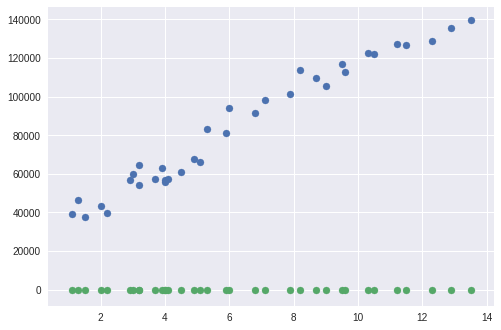

In [168]:
a = tensor(1.,-1)
y_hat = x@a
print(f'y_hat:{y_hat}')
print(f'error: {mse(y_hat,y)}')
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

This random guess is very bad - the error is very high and we can see that the y_hat values are too low. We will need to do gradient descent to find the best parameter values

**Gradient Descent**

In [0]:
def grad_descent(x,y,lr,epochs):
  '''Find best parameters that minimize mse'''
  
  a = nn.Parameter(tensor(1.,-1));

  for epoch in range(epochs):
    y_hat = x@a
    loss = mse(y, y_hat)
    if epoch % 100 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()
  return a

In [208]:
params = grad_descent(x,y,1e-2,1000)

tensor(8.0506e+09, grad_fn=<MeanBackward1>)
tensor(1.0487e+08, grad_fn=<MeanBackward1>)
tensor(61828804., grad_fn=<MeanBackward1>)
tensor(45304856., grad_fn=<MeanBackward1>)
tensor(38960620., grad_fn=<MeanBackward1>)
tensor(36524820., grad_fn=<MeanBackward1>)
tensor(35589608., grad_fn=<MeanBackward1>)
tensor(35230528., grad_fn=<MeanBackward1>)
tensor(35092672., grad_fn=<MeanBackward1>)
tensor(35039748., grad_fn=<MeanBackward1>)


Loss is decreasing, but still very high

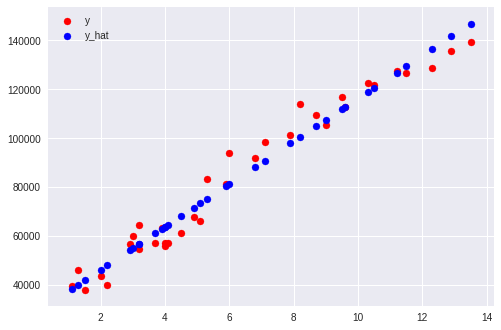

In [209]:
_, ax = plt.subplots()
ax.scatter(x[:,0],y, c='red', label = 'y')
ax.scatter(x[:,0],x@params, c='blue', label = 'y_hat')

plt.legend()
plt.show()

The predicted values seem to match the general linear trend of the data. The model has a high magnitude of loss because the data has curves while the model is a strict linear model

**Try different learning rates**

In [210]:
params = grad_descent(x,y,1e-1,1000)

tensor(8.0506e+09, grad_fn=<MeanBackward1>)
tensor(nan, grad_fn=<MeanBackward1>)
tensor(nan, grad_fn=<MeanBackward1>)
tensor(nan, grad_fn=<MeanBackward1>)
tensor(nan, grad_fn=<MeanBackward1>)
tensor(nan, grad_fn=<MeanBackward1>)
tensor(nan, grad_fn=<MeanBackward1>)
tensor(nan, grad_fn=<MeanBackward1>)
tensor(nan, grad_fn=<MeanBackward1>)
tensor(nan, grad_fn=<MeanBackward1>)


1e-1 is too big of a learning rate. It is jumping around too much and the loss ends up being infinity

In [211]:
params = grad_descent(x,y,1e-3,1000)

tensor(8.0506e+09, grad_fn=<MeanBackward1>)
tensor(2.0039e+08, grad_fn=<MeanBackward1>)
tensor(1.8532e+08, grad_fn=<MeanBackward1>)
tensor(1.7163e+08, grad_fn=<MeanBackward1>)
tensor(1.5918e+08, grad_fn=<MeanBackward1>)
tensor(1.4787e+08, grad_fn=<MeanBackward1>)
tensor(1.3759e+08, grad_fn=<MeanBackward1>)
tensor(1.2824e+08, grad_fn=<MeanBackward1>)
tensor(1.1975e+08, grad_fn=<MeanBackward1>)
tensor(1.1203e+08, grad_fn=<MeanBackward1>)


1e-3 is an ok learning rate. The loss *is* decreasing but too slowly. Would need to train with more epochs to get a lower loss

--

TODO: find a larger dataset to apply updates over minibatches. This would be stochastic gradient descent